# Chapter 8: Cryo-Electron Microscopy

Excursion: Single Particle Reconstruction in Cryo-Electron Microscopy

# Problem 8.1 - 1D, Alignment via Correlation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 84.5, 84.5, -0.5)

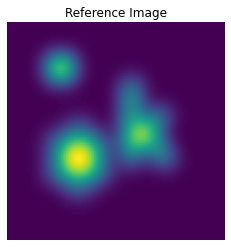

In [21]:
# Bringing the Reference Image data into the program using plt.imread and reshaping data to plot using plt.imshow
ref_im = plt.imread('test2Dblur.tif')
ref_im.shape
ref_im.dtype
ref_im[:10,:10]

# Plotting the reference image being used
plt.figure('Reference Image')
plt.title('Reference Image')
plt.imshow(ref_im)
plt.axis('off')

In [18]:
file = np.load('1dImages.npz')
file.files

# 1dImages.npz: contains variables:
#  noiselevels = array containing 1/sqrt(SNR) for each of 3 simulated datasets
#  shiftSD = how many pixels to jitter the fake data
#  samples = 3D array containing simulated images
#	 samples[i,j,k] where i=which image, j = position in image, k = which noiselevel

['samples', 'noiselevels', 'shiftSD']

In [19]:
# Splitting the .npz file, I was able to pull out the following variables:
samples = file['samples']
print("Samples = {} \n".format(samples))

noise = file['noiselevels']
print('Noise Levels = {} \n'.format(noise))

shift = file['shiftSD']
print('ShiftSD = {}'.format(shift))

Samples = [[[-0.34891339 -0.1744567  -0.04361418]
  [ 1.23325128  0.61662566  0.15415645]
  [-3.9701316  -1.98506588 -0.49626659]
  ...
  [-1.44030302 -0.72015155 -0.18003794]
  [-2.17315362 -1.0865768  -0.27164418]
  [ 0.6120713   0.30603565  0.07650891]]

 [[ 0.30164451  0.02627636 -0.18024976]
  [-1.39606299 -0.66465952 -0.11610692]
  [-1.00119849 -0.50954124 -0.1407983 ]
  ...
  [-0.44178586 -0.22089293 -0.05522323]
  [-0.4198908  -0.2099454  -0.05248635]
  [ 3.64324674  1.82162337  0.45540584]]

 [[ 1.04237307  1.55845213  1.94551143]
  [ 3.56336813  3.13312725  2.81044659]
  [ 0.34124124  1.45237727  2.2857293 ]
  ...
  [-3.36869882 -1.68434941 -0.42108735]
  [ 0.17679862  0.08839931  0.02209983]
  [-0.75173389 -0.37586694 -0.09396674]]

 ...

 [[ 2.48715621  1.24376507  0.31122171]
  [-0.43520711 -0.21830131 -0.05562195]
  [ 0.04489534  0.02505171  0.01016899]
  ...
  [ 2.70927792  1.35463896  0.33865974]
  [-0.19784718 -0.09892359 -0.0247309 ]
  [ 0.58714063  0.29357031  0.0733

In [108]:
# Splicing the 'samples' variable array into their i,j,k sub-variables when,
#   {samples[i,j,k] where i=which image, j = position in image, k = which noiselevel}
i = samples[:,0] # Which Image 
j = samples[:,1] # Position in Image
k = samples[:,2] # Which Noise Level
print('Which Image = \n',i, '\n\n')
print('Position in Image = \n',j, '\n\n')
print('Which Noise Level = \n',k, '\n\n')

# Pulling out the data set for each noise level
# Which Image
lsample_i = i[:,0] # large noise sample size = 2
msample_i = i[:,1] # Medium noise sample size = 1
ssample_i = i[:,2] # Small noise sample size = 0.25
print('Which Image: \n',ssample_i,'\n\n',msample_i,'\n\n', lsample_i,'\n\n')

# Position of Image
lsample_j = j[:,0]
msample_j = j[:,1]
ssample_j = j[:,2]
print('Position in Image: \n',ssample_j,'\n\n',msample_j,'\n\n', lsample_j,'\n\n')

# Which Noise Level
lsample_k = k[:,0]
msample_k = k[:,1]
ssample_k = k[:,2]
print('Which Noise Level: \n',ssample_k,'\n\n',msample_k,'\n\n', lsample_k,'\n\n')

Which Image = 
 [[-0.34891339 -0.1744567  -0.04361418]
 [ 0.30164451  0.02627636 -0.18024976]
 [ 1.04237307  1.55845213  1.94551143]
 ...
 [ 2.48715621  1.24376507  0.31122171]
 [-1.45370191 -0.72685004 -0.18171115]
 [ 1.30871882  0.68317693  0.21402051]] 


Position in Image = 
 [[ 1.23325128  0.61662566  0.15415645]
 [-1.39606299 -0.66465952 -0.11610692]
 [ 3.56336813  3.13312725  2.81044659]
 ...
 [-0.43520711 -0.21830131 -0.05562195]
 [ 1.30926286  0.65462804  0.16365192]
 [-0.0903844  -0.15274065 -0.19950783]] 


Which Noise Level = 
 [[-3.9701316  -1.98506588 -0.49626659]
 [-1.00119849 -0.50954124 -0.1407983 ]
 [ 0.34124124  1.45237727  2.2857293 ]
 ...
 [ 0.04489534  0.02505171  0.01016899]
 [ 2.51203832  1.25603183  0.31402695]
 [ 2.60269114  1.77854776  1.16044023]] 


Which Image: 
 [-0.04361418 -0.18024976  1.94551143 ...  0.31122171 -0.18171115
  0.21402051] 

 [-0.1744567   0.02627636  1.55845213 ...  1.24376507 -0.72685004
  0.68317693] 

 [-0.34891339  0.30164451  1.0423

0.25
[   1    2    3 ... 1498 1499 1500]


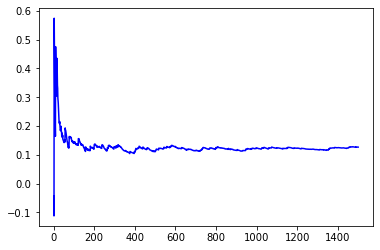

In [118]:
# For the lowest noise level, find the naive average of each pixel over samples and call it "Template"
min_noise = np.min(noise)
print(min_noise)

N = np.size(ssample_i)
n = np.arange(1,N+1)
n_ave = ssample_i.cumsum()/n
print(n)


plt.figure()
plt.plot(n,n_ave, 'b-');
#plt.plot(np.cumsum(np.ones(np.size(i[:,2]))), i[:,2], 'b.');